In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,accuracy_score

In [7]:
df = pd.read_csv('final_data.csv',index_col=False)

In [11]:
df = df.drop(df.columns[0], axis=1)
df = df.iloc[1:,:]

In [13]:
df.head()

,DATE,GoldsteinScale,NumMentions,NumSources,NumArticles,AvgTone,NumNews,Target
1,20140220,1.996429,5.833333,1.071429,5.833333,-2.587891,14,1.0
2,20140221,4.394444,6.148148,1.000000,5.592593,-2.688826,9,-1.0
3,20140222,0.788095,8.666667,1.000000,8.666667,3.159957,6,-1.0
4,20140223,2.726923,8.250000,1.000000,8.250000,-0.974292,13,1.0
5,20140224,2.414286,6.535714,1.000000,6.535714,-2.061723,7,-1.0


In [14]:
X = df.loc[:,df.columns != 'Target']
y = df.loc[:,df.columns == 'Target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

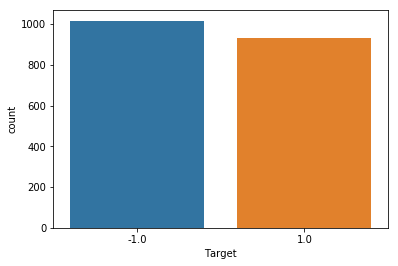

In [27]:
%matplotlib inline
sns.countplot(x='Target', data=df)

In [22]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(recall_score(y_test,y_pred,average=None))
print(accuracy_score(y_test,y_pred))

[0.80730897 0.35915493]
0.5897435897435898


C:\Users\sheny\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn import metrics, cross_validation
lr = LogisticRegression()
scores_accuracy = cross_val_score(lr, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(lr, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(lr, X, y, cv=10, scoring='roc_auc')

C:\Users\sheny\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sheny\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sheny\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sheny\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [24]:
print (scores_accuracy.mean())
print (scores_log_loss.mean())
print (scores_auc.mean())

0.5975502381761586
-0.6881495398330258
0.7326153204565077
